# Mars_weather
## Part 2: Scraping and Analysis of Mars Weather Data

In [1]:
# Importing relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup

In [2]:
browser = Browser('chrome')

### Visiting the Website

Using automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspecting the page to identify which elements to scrape


In [3]:
# visiting the Mars facts website for temperatures
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

# Optional delay for loading the page
# browser.is_element_present_by_css('div.table', wait_time=1)

### Scraping the Table

Creating a Beautiful Soup object and using it to scrape the data in the HTML table.


In [4]:
# gathering the html from the current page in the browser
html = browser.html

# creating a Beautiful Soup object from the scraped HTML
soup = soup (html, 'html.parser')

In [5]:
# extracting all rows of data
data_row = soup.find_all("tr", class_="data-row")

In [43]:
# checking if all rows are extracted with len 
# print(len(data_row))
# checking data
# print(data_row)

### Storing the Data

Assembling the scraped data into a Pandas DataFrame

The columns have the same headings as the table on the website 

Below is an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# option 1 creating dictionary to create a dataframe for analysis
# creating an empty list to store the dictionaries
data = []

#looping through scraped data to create a list of rows
for row in data_row:
    row_data = []
    for td in row.select("td"):
        row_data.append(td.text)
    data.append(row_data)

In [11]:
# option 2 creating dictionary to create a dataframe for analysis
# creating an empty list to store the dictionaries
# summary_list = []
# data = []

# looping through rows for headings
# headings = data_row.find_all("th")
# for header in headings:
#     summary_list.append(header.get_text())

    # for row in data_row:
    # items = []
    # row_data = row.find_all("td")
    # for results in row_data:
    #     items.append(results.text)
    #data.append(items)

In [51]:
# displaying the scraped data
# data

In [7]:
# quitting browsing session
browser.quit()

In [27]:
# Importing pandas dependencies
import pandas as pd

In [28]:
# create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data, columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])

In [29]:
# confirming if the DataFrame created successfully
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Preparation of Data for Analysis

Examining the data types that are currently associated with each column

If necessary, casting (converting) the data to the appropriate `datetime`, `int`, or `float` data types

In [30]:
# examining the data type of each column
df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [31]:
# changing data types for data analysis
df = df.astype({"id":int, "terrestrial_date": "datetime64[ns]", "sol":int, "ls":int, "month":int, "min_temp":float, "pressure":float})


In [32]:
# confirming type changes were successful by examining data types again
df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Analysis of the Data

Analysis of the dataset using Pandas functions answering the following questions:
1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * The average the minimum daily temperature for all of the months
    * Plot the results as a bar chart
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * The average the daily atmospheric pressure of all the months
    * Plot the results as a bar chart
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * How many days elapse on Earth in the time that Mars circles the Sun once
    * Visually estimating the result by plotting the daily minimum temperature


In [49]:
# 1. How many months are there on Mars?
mars_months = df["month"].value_counts().sort_index()
print("There are 12 months on Mars.")
print(mars_months)

There are 12 months on Mars.
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64


In [50]:
# 2. How many Martian days' worth of data are there?
# looking into 'sol' column to see how many Martian days there are in data
Martian_days = df["sol"].count()
print(f"There are {Martian_days} Martian days in Mars.")

There are 1867 Martian days in Mars.


In [60]:
# 3. What is the average low temperature by month?
mars_avg_low = df[["month", "min_temp"]].groupby("month").mean().round(2)
mars_avg_low

,min_temp
month,
1,-77.16
2,-79.93
3,-83.31
4,-82.75
5,-79.31
6,-75.30
7,-72.28
8,-68.38
9,-69.17


In [61]:
# Importing matplotlib dependencies
import matplotlib.pyplot as plt

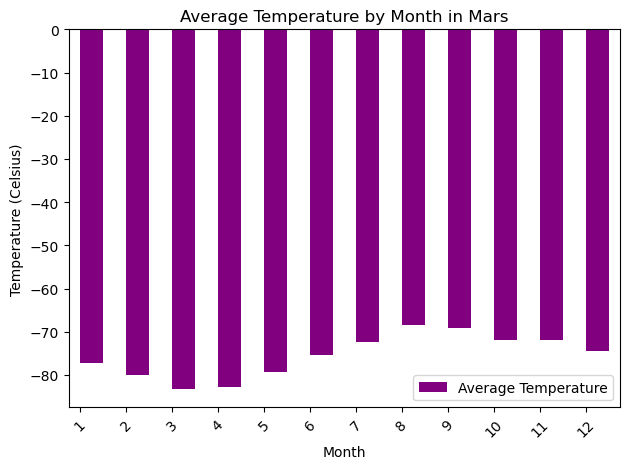

In [70]:
# plotting the average temperature by month
mars_avg_low.plot.bar(color="purple", alpha=1, align="edge")

# giving names and title to bar plot
plt.xlabel("Month")
plt.ylabel("Temperature (Celsius)")
plt.title("Average Temperature by Month in Mars")
plt.legend(["Average Temperature"])
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

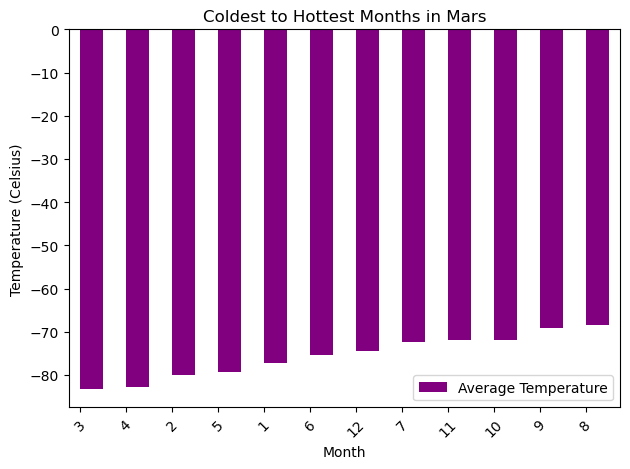

In [76]:
# identifying the coldest and hottest months in Curiosity's location and plotting
mars_avg_low.sort_values(by="min_temp", ascending=True).plot.bar(color="purple", alpha=1, align="edge")

# giving names and title to bar plot
plt.xlabel("Month")
plt.ylabel("Temperature (Celsius)")
plt.title("Coldest to Hottest Months in Mars")
plt.legend(["Average Temperature"])
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [78]:
# 4. average pressures by Martian month
mars_avg_pressure = df[["month", "pressure"]].groupby("month").mean().round(2)
mars_avg_pressure

,pressure
month,
1,862.49
2,889.46
3,877.32
4,806.33
5,748.56
6,745.05
7,795.11
8,873.83
9,913.31


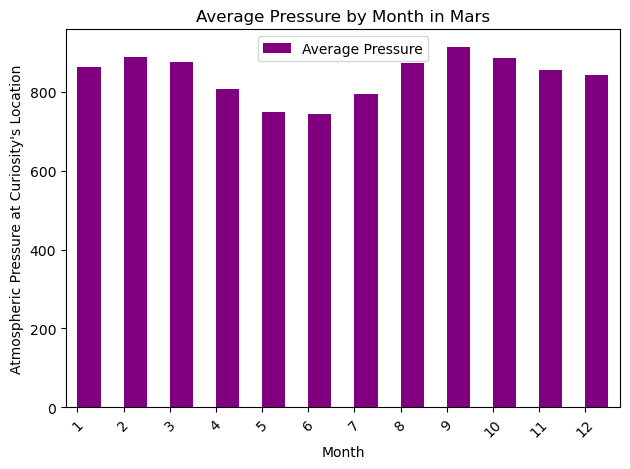

In [87]:
# plotting the average pressure by month
mars_avg_pressure.plot.bar(color="purple", alpha=1, align="edge")

# giving names and title to bar plot
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure at Curiosity's Location")
plt.title("Average Pressure by Month in Mars")
plt.legend(["Average Pressure"])
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

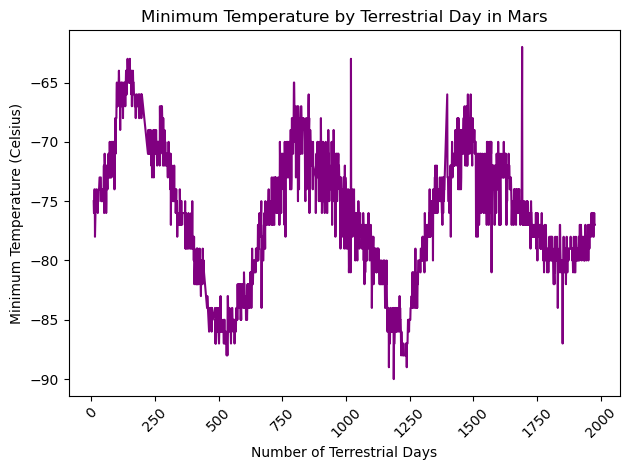

In [89]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(df["sol"], df["min_temp"], color="purple", alpha=1)

# giving names and title to bar plot
plt.xlabel("Number of Terrestrial Days")
plt.ylabel("Minimum Temperature (Celsius)")
plt.title("Minimum Temperature by Terrestrial Day in Mars")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Analysis

* On average, the 3rd month has the coldest minimum temperature on Mars.

* On average, the 8th month is the warmest month on Mars.

* On average, the lowest atmospheric pressure is in the 6th month and highest in the 9th month.

* The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Saving the Data

Exporting the DataFrame to a CSV file.

In [91]:
# writing the data to a CSV
df.to_csv("./Output/mars_data.csv", index=False)
mars_avg_low.to_csv("./Output/mars_avg_low.csv", index=False)
mars_avg_pressure.to_csv("./Output/mars_avg_pressure.csv", index=False)
